In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# Cargar el conjunto de datos de iris
iris = datasets.load_iris()
X = iris.data[:, :2]  # Usamos solo dos características para facilitar la visualización
y = iris.target

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Estandarizar las características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [3]:
# Crear el modelo SVM con un kernel lineal
svm = SVC(kernel= "rbf", C=1.0, random_state=42)
svm.fit(X_train, y_train)

# Realizar predicciones
y_pred = svm.predict(X_test)

In [4]:
# Evaluar el rendimiento del modelo
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[10  0  0]
 [ 0  7  2]
 [ 0  3  8]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.70      0.78      0.74         9
           2       0.80      0.73      0.76        11

    accuracy                           0.83        30
   macro avg       0.83      0.84      0.83        30
weighted avg       0.84      0.83      0.83        30



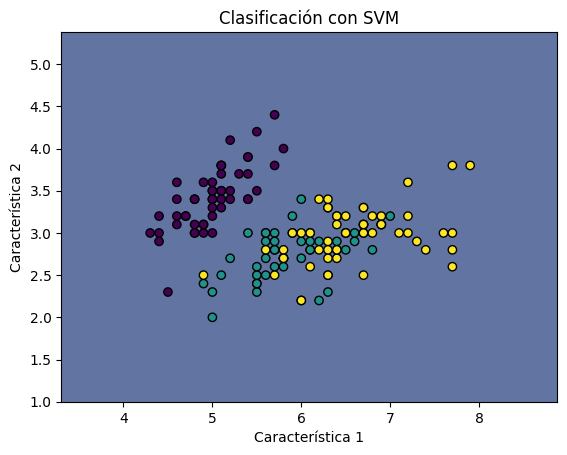

In [5]:
# Crear una malla para visualizar el hiperplano de decisión
h = .02  # Paso de la malla
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predecir las clases para cada punto en la malla
Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Dibujar el contorno y los puntos de datos
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', marker='o')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.title('Clasificación con SVM')
plt.show()